<a href="https://colab.research.google.com/github/usmanqadeer1/AI-MLProjects/blob/master/Tensorflow_Specialization/CNN_sign_language_Multi_class_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files

The data for this exercise is available at: https://www.kaggle.com/datamunge/sign-language-mnist/home

 - Sign up, Go to Edit profile and click on "Create New Api Key"
 - kaggle.json file will be downloaded
 - upload it here


In [ ]:
! pip install -q kaggle
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"eeusmanqadeer","key":"d151dae55c4b854a9b91279b75d8ae02"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! kaggle datasets download -d datamunge/sign-language-mnist

 91% 57.0M/62.6M [00:01<00:00, 42.5MB/s]
100% 62.6M/62.6M [00:01<00:00, 46.3MB/s]


In [ ]:
!unzip -q sign-language-mnist.zip

In [ ]:

def get_data(filename):
  # You will need to write code that will read the file passed
  # into this function. The first line contains the column headers
  # so you should ignore it
  # Each successive line contians 785 comma separated values between 0 and 255
  # The first value is the label
  # The rest are the pixel values for that picture
  # The function will return 2 np.array types. One with all the labels
  # One with all the images
  #
  # Tips: 
  # If you read a full line (as 'row') then row[0] has the label
  # and row[1:785] has the 784 pixel values
  # Take a look at np.array_split to turn the 784 pixels into 28x28
  # You are reading in strings, but need the values to be floats
  # Check out np.array().astype for a conversion
    with open(filename) as training_file:
        reader = csv.reader(training_file, delimiter=',')
        images = []
        labels = []
        next(reader, None)
        
        for row in reader:
            label = row[0]
            img = row[1:785]
            img = np.array(img).reshape((28, 28))
            
            labels.append(label)
            images.append(img)
            
            
        images = np.array(images).astype(float)
        labels = np.array(labels).astype(float)

    return images, labels

training_images, training_labels = get_data('sign_mnist_train.csv')
testing_images, testing_labels = get_data('sign_mnist_test.csv')

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [ ]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28) make it (10000, 28, 28, 1)

training_images = np.expand_dims(training_images, axis = 3)
testing_images = np.expand_dims(testing_images, axis = 3)

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
    )

# If rescaling on training set then during evaluation rescale by the same factor
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(training_images, training_labels, batch_size = 128)
validation_generator = validation_datagen.flow(testing_images, testing_labels, batch_size = 128)

# Keep These
print(training_images.shape)
print(testing_images.shape)

testing_images = testing_images/255
training_images = training_images/255

In [ ]:

# model from kaggle
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 75, kernel_size = (3, 3), activation = 'relu', padding = 'same', input_shape = (28, 28, 1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2), padding = 'same'),

    tf.keras.layers.Conv2D(filters = 50, kernel_size = (3, 3), activation = 'relu', padding = 'same'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D((2,2) , strides = 2 , padding = 'same'),

    tf.keras.layers.Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D((2,2) , strides = 2 , padding = 'same'),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units = 512 , activation = 'relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(units = 25 , activation = 'softmax')
])

model.summary()
# Compile Model. 
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])


# Train the Model


Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 28, 28, 75)        750       
_________________________________________________________________
batch_normalization_30 (Batc (None, 28, 28, 75)        300       
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 14, 14, 75)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 14, 14, 50)        33800     
_________________________________________________________________
dropout_20 (Dropout)         (None, 14, 14, 50)        0         
_________________________________________________________________
batch_normalization_31 (Batc (None, 14, 14, 50)        200       
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 7, 7, 50)        

In [ ]:
history = model.fit_generator(generator = train_generator, 
                              epochs = 50,
                              validation_data = validation_generator,
                              verbose = 1)


Epoch 1/50
215/215 [==============================] - 8s 36ms/step - loss: 0.3758 - accuracy: 0.8686 - val_loss: 0.4633 - val_accuracy: 0.8445
Epoch 2/50
215/215 [==============================] - 8s 36ms/step - loss: 0.3460 - accuracy: 0.8828 - val_loss: 0.2229 - val_accuracy: 0.9204
Epoch 3/50
215/215 [==============================] - 8s 35ms/step - loss: 0.3260 - accuracy: 0.8902 - val_loss: 0.3561 - val_accuracy: 0.8535
Epoch 4/50
215/215 [==============================] - 8s 36ms/step - loss: 0.3062 - accuracy: 0.8970 - val_loss: 0.2892 - val_accuracy: 0.8991
Epoch 5/50
215/215 [==============================] - 8s 36ms/step - loss: 0.3018 - accuracy: 0.8967 - val_loss: 0.8202 - val_accuracy: 0.7471
Epoch 6/50
215/215 [==============================] - 8s 36ms/step - loss: 0.2786 - accuracy: 0.9037 - val_loss: 0.9959 - val_accuracy: 0.7082
Epoch 7/50
215/215 [==============================] - 8s 37ms/step - loss: 0.2767 - accuracy: 0.9064 - val_loss: 0.1696 - val_accuracy: 0.9472

In [ ]:
model.evaluate(testing_images, testing_labels)

225/225 [==============================] - 1s 3ms/step - loss: 0.0470 - accuracy: 0.9858


[0.046965353190898895, 0.9857780337333679]

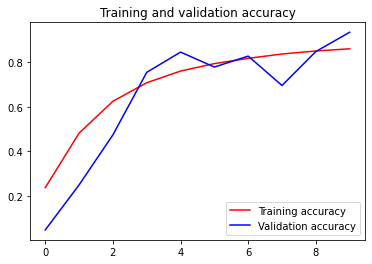

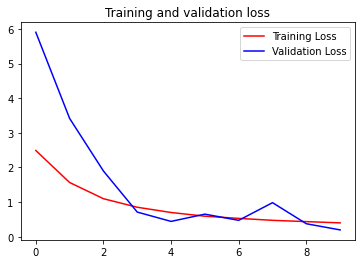

In [ ]:
# Plot the chart for accuracy and loss on both training and validation

import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
def predict_image(image, label):
  print('predicted',np.argmax(model.predict(image.reshape(1,28,28,1))))
  print('original',label)

  plt.imshow(image.reshape(28,28), cmap = 'gray')
  

predicted 18
original 18.0


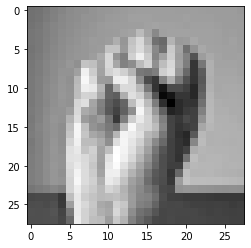

In [ ]:
predict_image(training_images[10], training_labels[10])

predicted 6
original 6.0


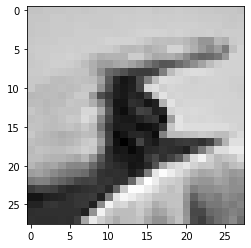

In [ ]:
predict_image(testing_images[0], testing_labels[0])